![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/TrainingNotebooks/tutorials/Certification_Trainings/1.2.Image_processing.ipynb)

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

## Setup

In [ ]:
import os
import pkg_resources
import sparkocr
from sparkocr.transformers import *
from sparkocr.utils import *

import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


spark = start_spark()
print("Spark OCR Version :", sparkocr.version())

## Read image


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


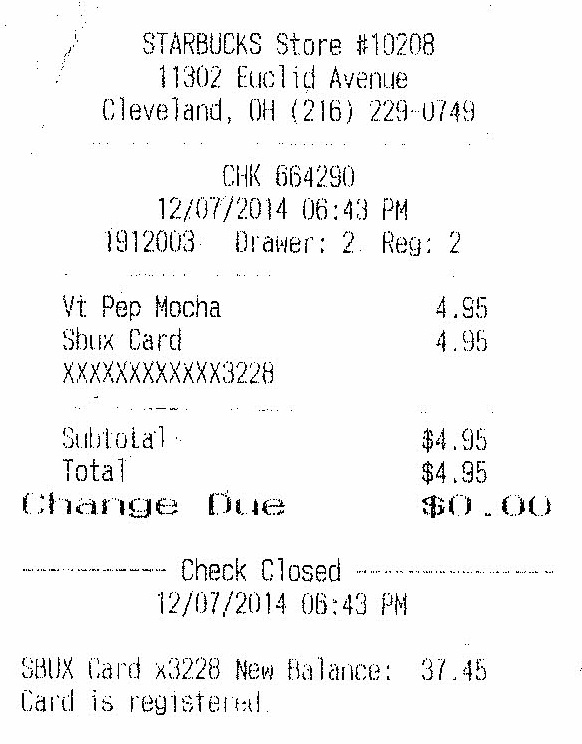

In [2]:
image_path = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/check.jpg')
image_example_df = spark.read.format("binaryFile").load(image_path)
image_df = BinaryToImage().transform(image_example_df).cache()

display_images(image_df)

## Scaling


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


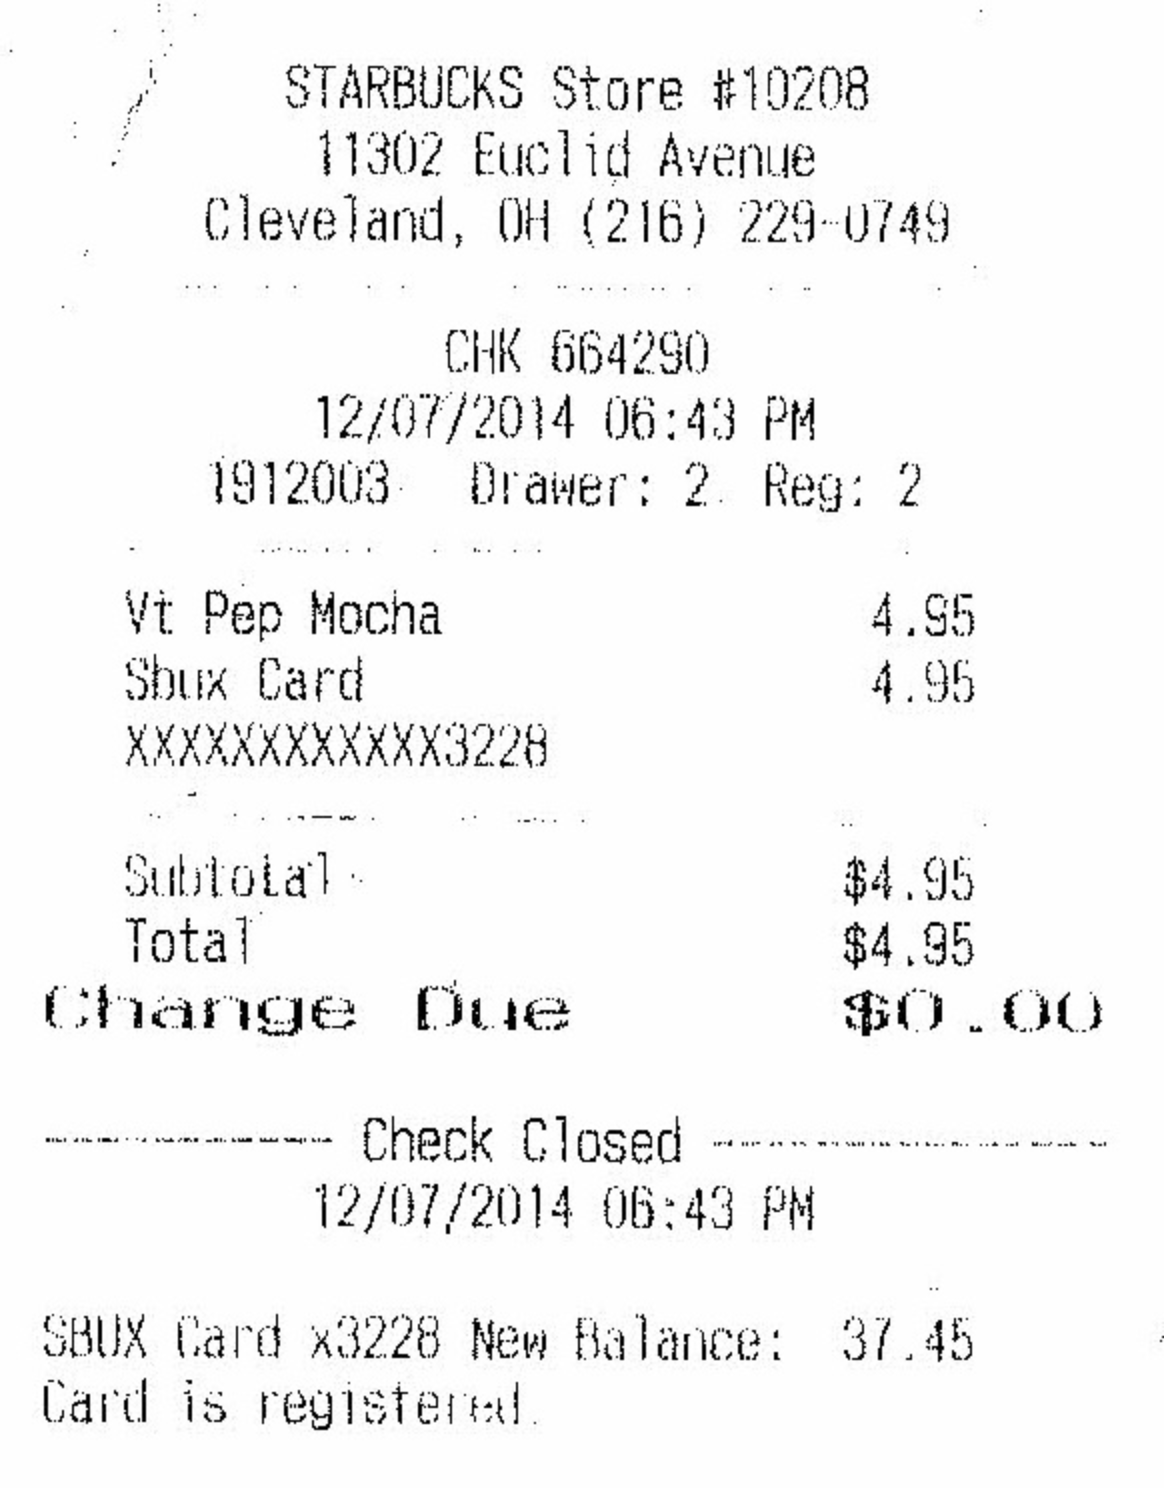

In [3]:
scaled_image_df = ImageTransformer() \
    .addScalingTransform(2) \
    .setInputCol("image") \
    .setOutputCol("scaled_image") \
    .setImageType(ImageType.TYPE_BYTE_GRAY) \
    .transform(image_df)

display_images(scaled_image_df, "scaled_image")

## Image Adaptive Thresholding


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


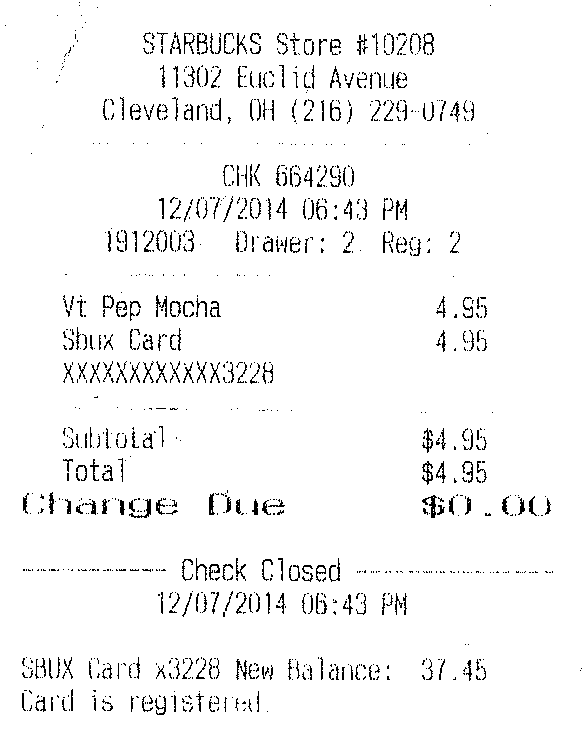

In [4]:
thresholded_image = ImageTransformer() \
    .addAdaptiveThreshold(21, 20)\
    .setInputCol("image") \
    .setOutputCol("thresholded_image") \
    .transform(image_df)

display_images(thresholded_image, "thresholded_image")

## Erosion


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


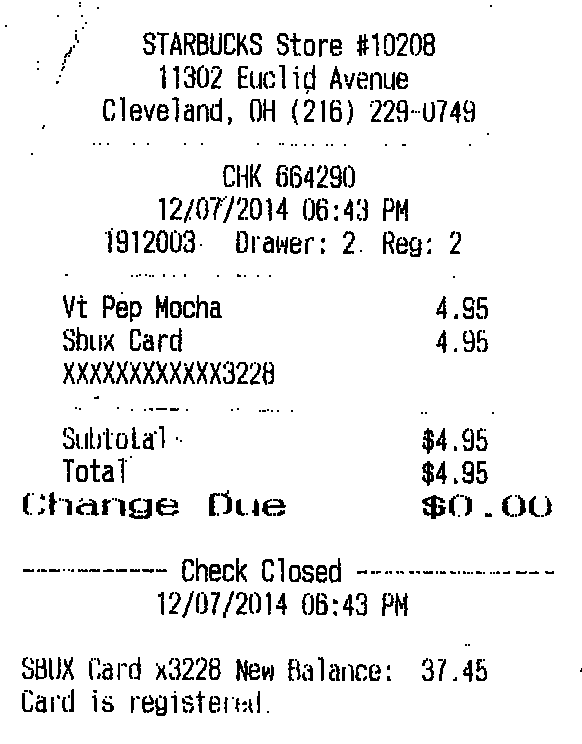

In [5]:
eroded_image = ImageTransformer() \
.addErodeTransform(2,2)\
.setInputCol("image") \
.setOutputCol("eroded_image") \
.transform(image_df)

display_images(eroded_image, "eroded_image")

## Dilation


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


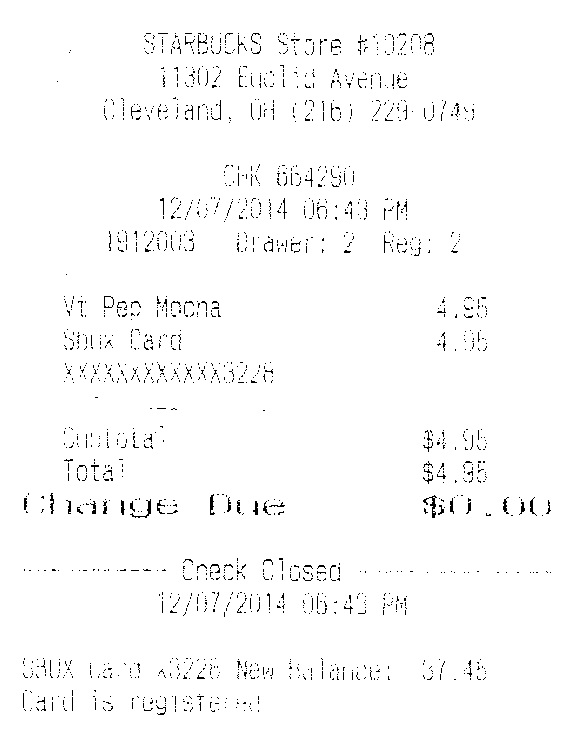

In [6]:
dilated_image = ImageTransformer() \
.addDilateTransform(1, 2)\
.setInputCol("image") \
.setOutputCol("dilated_image") \
.transform(image_df)

display_images(dilated_image, "dilated_image")

## Remove Objects


    Image #0:
    Origin: file:/home/ubuntu/.local/lib/python3.8/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


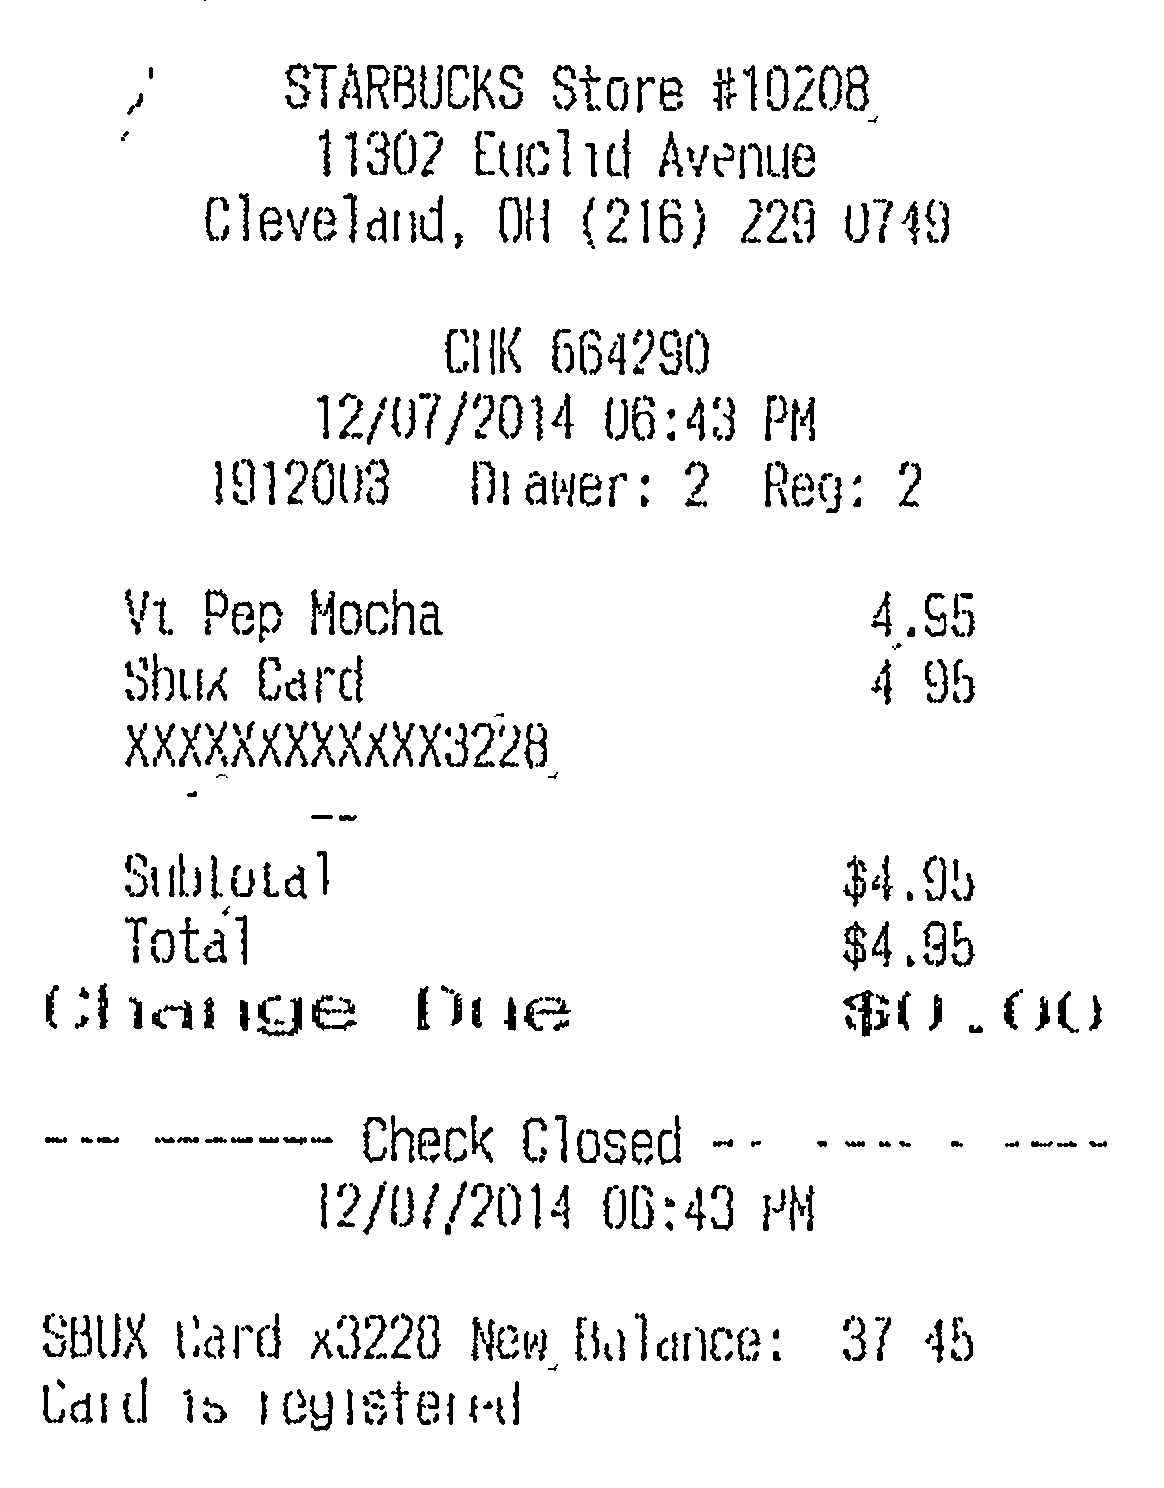

In [7]:
corrected_image = ImageTransformer() \
    .addScalingTransform(2) \
    .addAdaptiveThreshold(31, 2)\
    .addRemoveObjects(10, 500) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

display_images(corrected_image, "corrected_image")

## Median Blur


    Image #0:
    Origin: file:/Users/nmelnik/.local/share/virtualenvs/OcrMissedPages-W3gpzUuJ/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


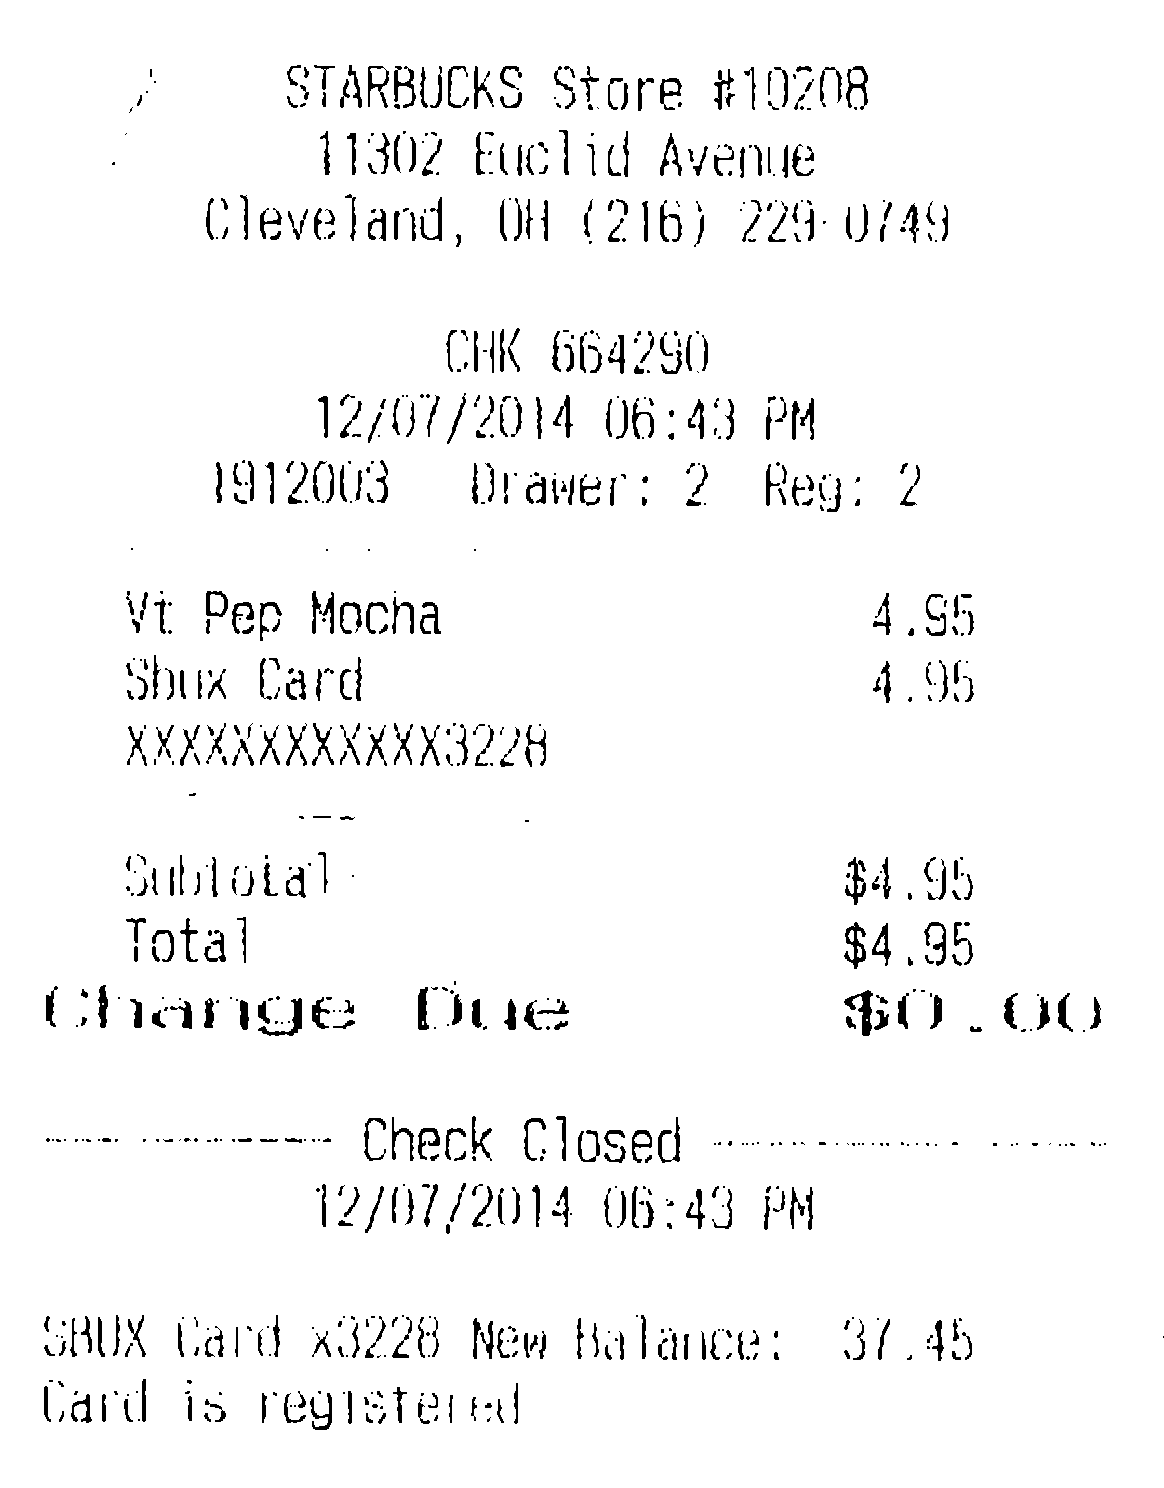

In [ ]:
corrected_image = ImageTransformer() \
    .addScalingTransform(2) \
    .addMedianBlur(3) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

display_images(corrected_image, "corrected_image")

## GPU Image transformation


    Image #0:
    Origin: file:/Users/nmelnik/.local/share/virtualenvs/OcrMissedPages-W3gpzUuJ/lib/python3.7/site-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 4656 px
    Height: 5952 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


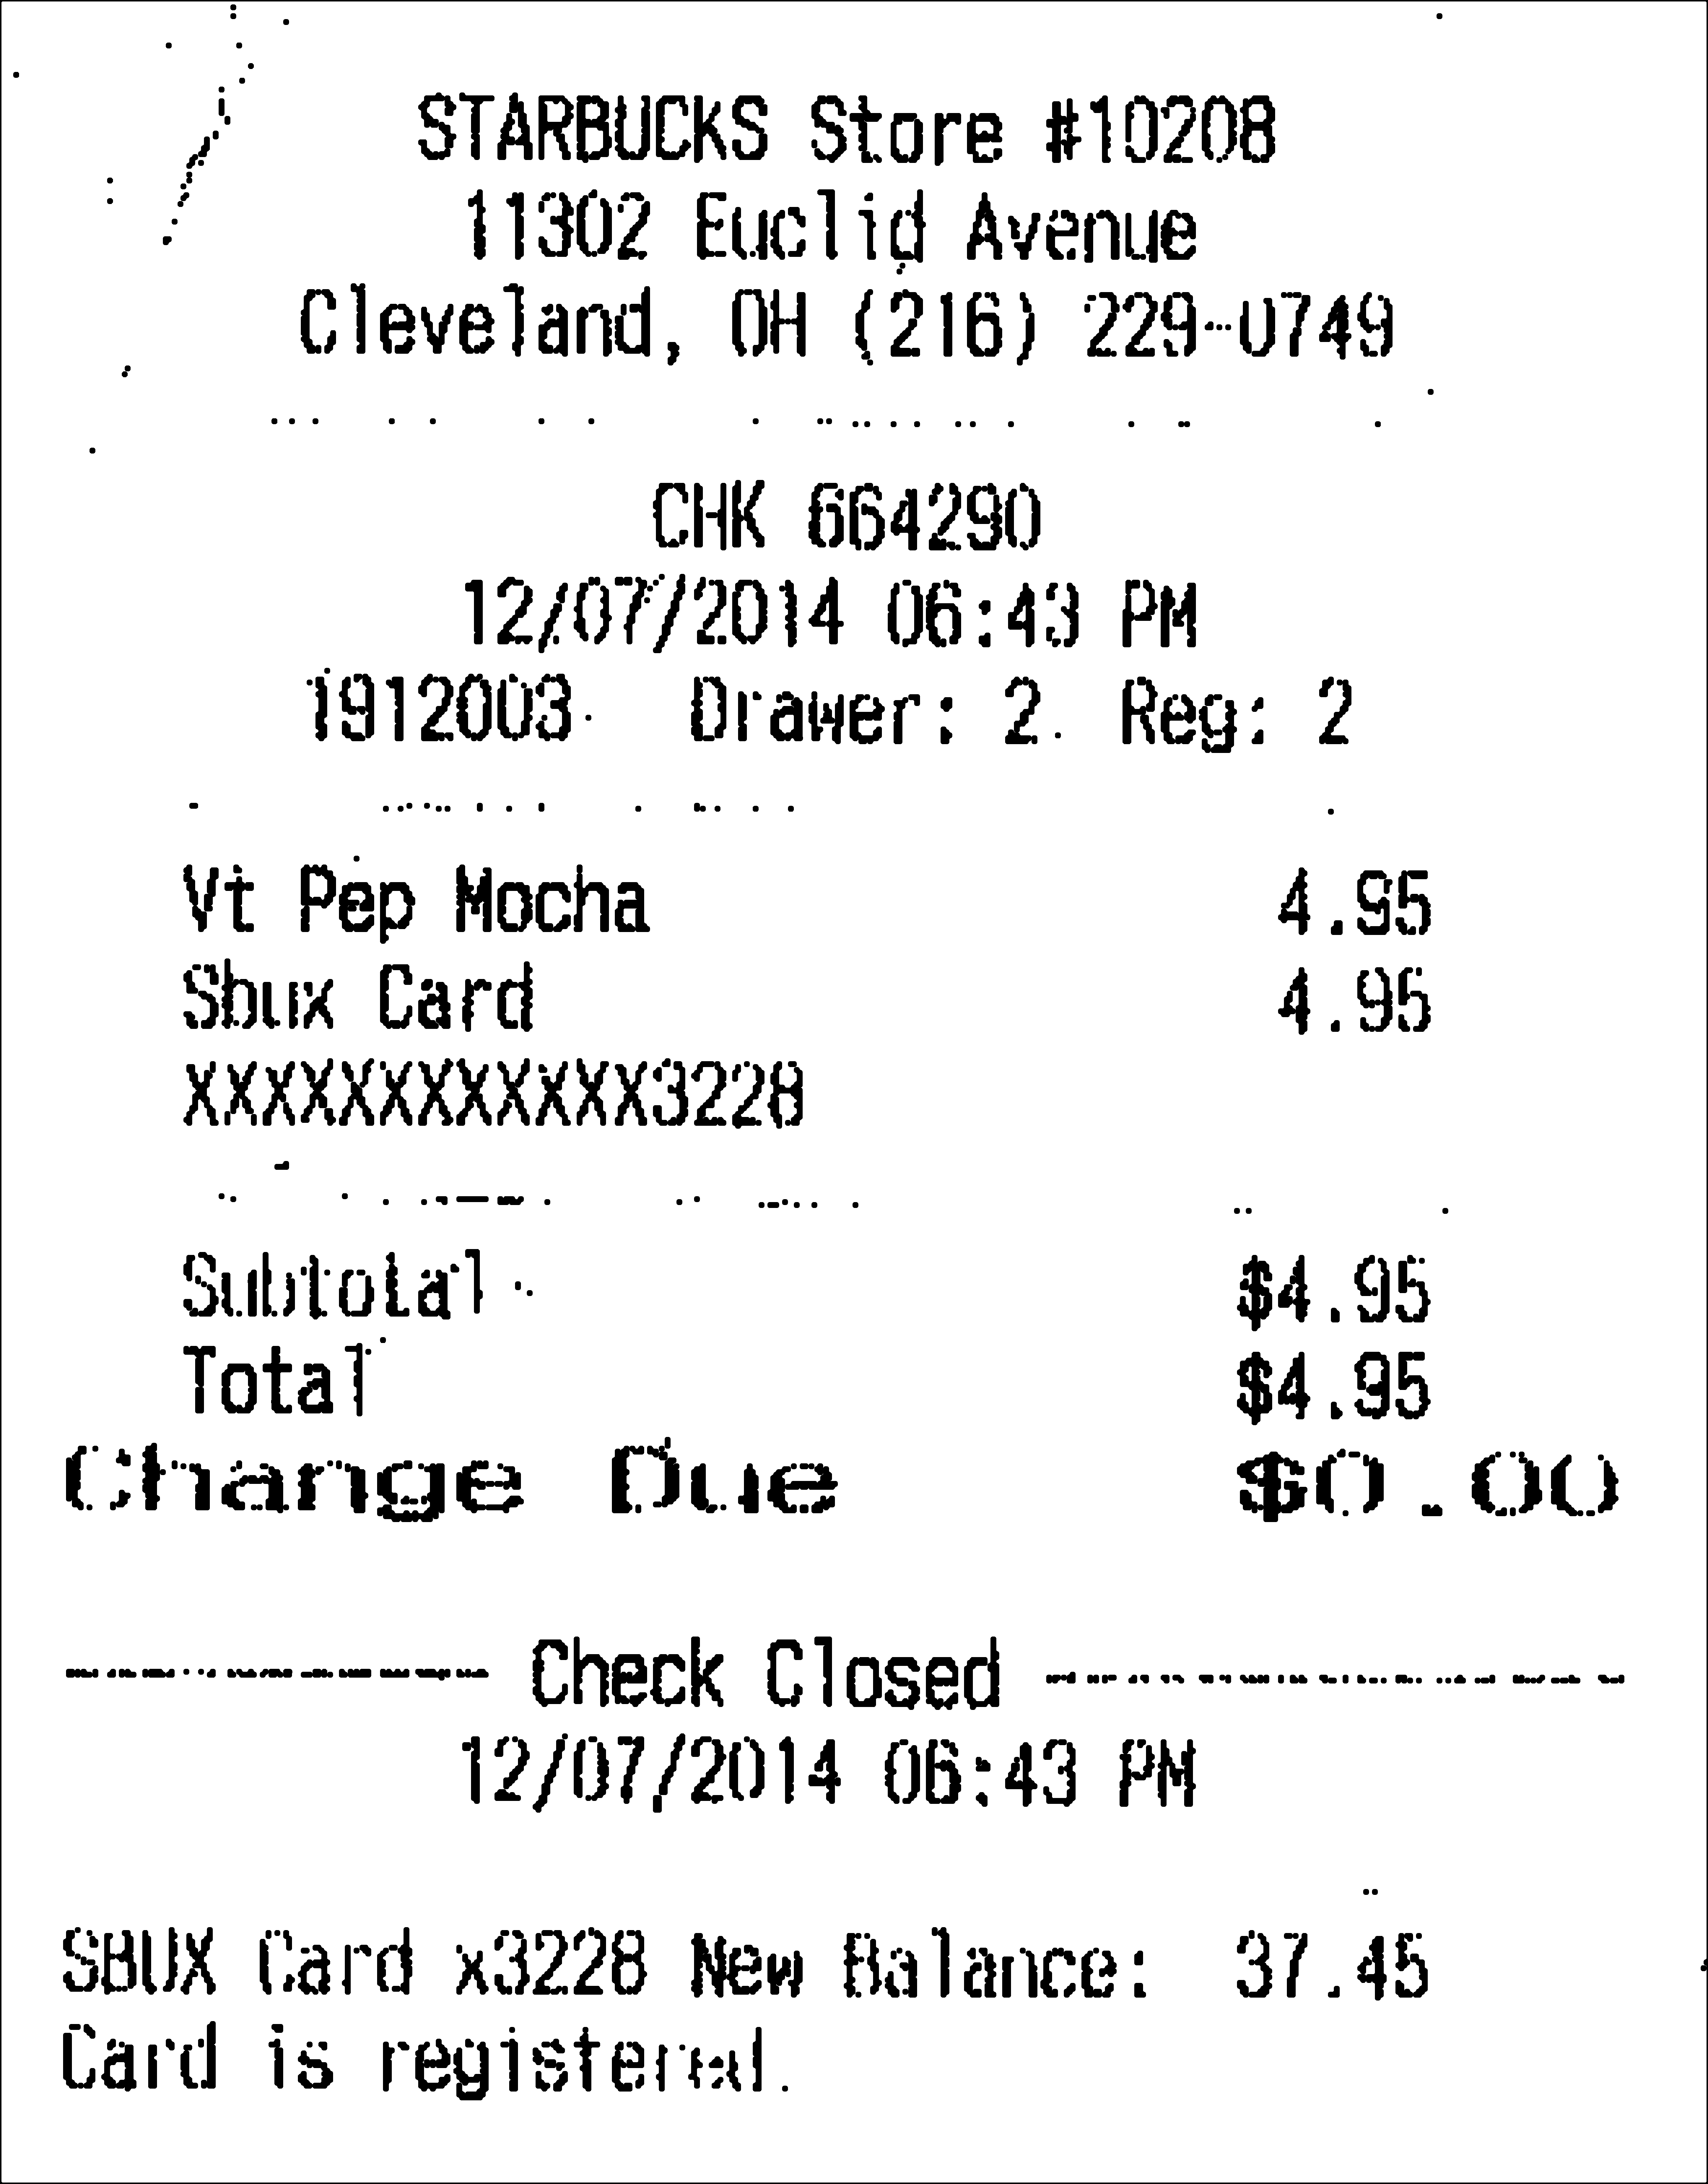

In [ ]:
multiple_image = GPUImageTransformer() \
    .addScalingTransform(8) \
    .addOtsuTransform() \
    .addErodeTransform(3, 3) \
    .setInputCol("image") \
    .setOutputCol("multiple_image") \
    .transform(image_df)

display_images(multiple_image, "multiple_image")